# Генерируем выборку


In [1]:
# !pip install seaborn

In [2]:
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Напишем функцию для генерации бинарного признака с заданной вероятностью
def generate_bin(prob):
    n = 10000
    a = []
    n_pos = int(n*prob)
    n_neg = int(n - n_pos)
    for i in range(n_pos):
        a.append(1)
    for i in range(n_pos, n+1):
        a.append(0)
    return a[randint(0, n)]

In [4]:
#def db_generator(l5, acc_rate1, OBS_rate1, chron_rate1, 
#              g5l10, acc_rate2, OBS_rate2, chron_rate2)

expirience = []
expirience_num = []
accidents = []
OBS = [] # СЭВ - occupational burnout syndrome
chronic_ilnesses = []
dpt = [] # отделение


#for i in range(0,3):
for i in range(0,30):
    expirience.append("< 5 лет")
    expirience_num.append(1)
    acc = 0
    for i in range(5):
        acc += generate_bin(0.08)
    #accidents.append(generate_bin(0.08))
    accidents.append(acc)
    OBS.append(generate_bin(0.1))
    chronic_ilnesses.append(generate_bin(0.03))  
#for i in range(8):
for i in range(80):
    expirience.append("5 - 10 лет")
    expirience_num.append(2)
#    accidents.append(generate_bin(0.10))
    acc = 0
    for i in range(5):
        acc += generate_bin(0.1)
    accidents.append(acc)
    OBS.append(generate_bin(0.15))
    chronic_ilnesses.append(generate_bin(0.03))
#for i in range(12):
for i in range(120):
    expirience.append("10 - 15 лет")
    expirience_num.append(3)
#    accidents.append(generate_bin(0.12))
    acc = 0
    for i in range(5):
        acc += generate_bin(0.12)
    accidents.append(acc)
    OBS.append(generate_bin(0.25))
    chronic_ilnesses.append(generate_bin(0.05))
for i in range(40):
    expirience.append("> 15 лет")
    expirience_num.append(4)
#    accidents.append(generate_bin(0.15))
    acc = 0
    for i in range(5):
        acc += generate_bin(0.15)
    accidents.append(acc)
    OBS.append(generate_bin(0.25))
    chronic_ilnesses.append(generate_bin(0.25))
for i in range(30 + 80+120+40):
    dpt.append("Инфекционное отделение")
    

#df = pd.DataFrame( ( expirience, accidents, OBS, chronic_ilnesses, dpt), columns = ['expirience', 'accidents', 'OBS', 'chronic_ilnesses', 'dpt'])
df = pd.DataFrame({
    'expirience' : expirience,
    'expirience_num' : expirience_num,
    'accidents' : accidents,
    'OBS' : OBS,
    'chronic_ilnesses' : chronic_ilnesses,
    'dpt' : dpt
})
df.head(70)

#expirience, 
#generate_bin(0.5)

,expirience,expirience_num,accidents,OBS,chronic_ilnesses,dpt
0,< 5 лет,1,1,0,1,Инфекционное отделение
1,< 5 лет,1,2,0,0,Инфекционное отделение
2,< 5 лет,1,0,0,0,Инфекционное отделение
3,< 5 лет,1,1,0,0,Инфекционное отделение
4,< 5 лет,1,1,0,0,Инфекционное отделение
...,...,...,...,...,...,...
65,5 - 10 лет,2,0,0,1,Инфекционное отделение
66,5 - 10 лет,2,0,0,0,Инфекционное отделение
67,5 - 10 лет,2,1,0,0,Инфекционное отделение
68,5 - 10 лет,2,2,1,0,Инфекционное отделение


In [5]:
df_unsorted = df.sample(frac=1)
PREPARED_DATASET_PATH = './illnesses.csv'
df_unsorted.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

In [6]:
exp_dict = {
    '< 5 лет' : 1,
    '5 - 10 лет' : 2,
    '10 - 15 лет' : 3,
    '> 15 лет' : 4
           }

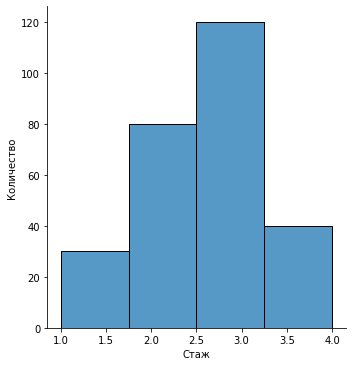

In [13]:
g = sns.displot(expirience_num, bins = 4)
g.set_axis_labels("Стаж", "Количество")


In [49]:
df_num_features = df.copy()
df_num_features.drop('expirience', axis=1, inplace=True)
g = df_num_features.hist(figsize=(10,8), bins=4, grid=True)






KeyError: "None of [Index(['dsf'], dtype='object')] are in the [columns]"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


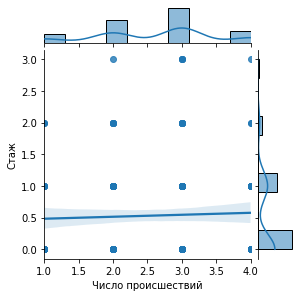

In [25]:
grid = sns.jointplot(df['expirience_num'], df['accidents'], kind='reg')
grid.fig.set_figwidth(4)
grid.fig.set_figheight(4)

grid.set_axis_labels('Число происшествий', 'Стаж')

plt.ylabel("aaf")
plt.show()

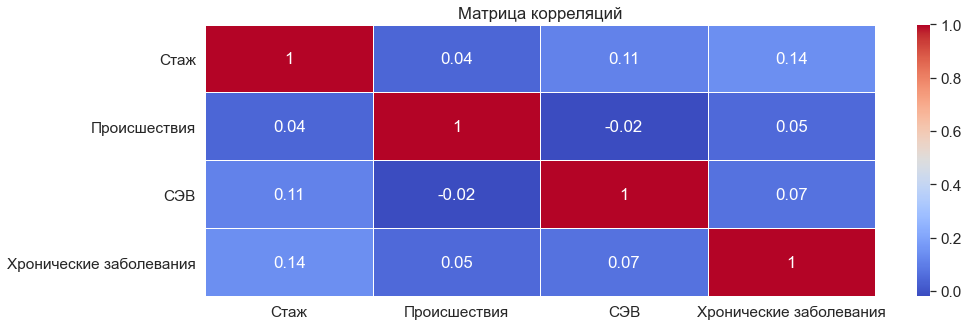

In [44]:
plt.figure(figsize = (15,5))

sns.set(font_scale=1.4)

corr_matrix = df_num_features.corr()
corr_matrix = np.round(corr_matrix, 2)
#corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix = corr_matrix.rename(columns={'expirience_num':"Стаж", 'accidents':"Происшествия", 'OBS':"СЭВ", "chronic_ilnesses":"Хронические заболевания"},
                   index={'expirience_num':"Стаж", 'accidents':"Происшествия", 'OBS':"СЭВ", "chronic_ilnesses":"Хронические заболевания"} 
)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()



In [ ]:
df = pd.read_csv("illnesses.csv")